In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/NN Labs/NN Project

In [2]:
# Path for Karen
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/NN Project

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/content/gdrive/My Drive/NN Project'
/content/gdrive/My Drive/Colab Notebooks/NN Labs/NN Project


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model, load_model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import metrics
plt.style.use('seaborn')

Using TensorFlow backend.


In [4]:
#read market
apple_df = pd.read_csv('data/apple_data.csv')
apple_df.head()

,Unnamed: 0,time,open,close,close_open_diff,volume,urgency,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts3D,volumeCounts5D,volumeCounts7D,returnsOpenPrevMktres1,returnsOpenPrevRaw1,returnsClosePrevRaw1,returnsOpenPrevRaw10,returnsOpenPrevMktres10,returnsOpenNextMktres10
0,2,2007-02-01,86.230,84.74,0.982721,23747329.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016324,-0.011548,-0.037182,0.0,-0.007425
1,878,2007-02-02,84.120,84.75,1.007489,22212416.0,2.500000,0.719415,-0.125000,0.293271,0.399077,0.307652,1.687500,1.687500,1.687500,29.000000,44.375000,45.437500,-0.026983,-0.024469,0.000118,-0.050779,0.0,-0.009770
2,1752,2007-02-05,84.300,83.94,0.995730,20737742.0,2.333333,0.894933,0.333333,0.236076,0.288736,0.475188,1.333333,1.444444,1.444444,8.666667,26.777778,51.222222,0.001477,0.002140,-0.009558,-0.054297,0.0,0.005037
3,2624,2007-02-06,84.450,84.15,0.996448,30893975.0,3.000000,0.368688,0.272727,0.284675,0.273210,0.442116,0.363636,0.363636,0.454545,18.181818,37.818182,51.636364,0.002135,0.001779,0.002502,-0.014931,0.0,0.057268
4,3494,2007-02-07,84.495,86.15,1.019587,38180972.0,2.846154,0.357001,-0.461538,0.448793,0.359431,0.191777,1.076923,1.076923,1.076923,32.846154,44.692308,55.769231,0.000392,0.000533,0.023767,-0.025039,0.0,0.034650


In [0]:
apple_x = apple_df[['close_open_diff', 'urgency', 'relevance','sentimentClass', 'sentimentNegative', 'sentimentNeutral', 'sentimentPositive','noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D', 'volumeCounts3D', 'volumeCounts5D', 'volumeCounts7D', 'returnsOpenPrevMktres1', 'returnsClosePrevRaw1', 'returnsOpenPrevRaw10', 'returnsOpenPrevMktres10']]
apple_x = np.array(apple_x)

apple_y = apple_df['returnsOpenNextMktres10']
apple_y = np.array(apple_y)

test_num_rows = 250
train_num_rows = len(apple_df) - 250

X_train = apple_x[:train_num_rows]
X_test = apple_x[-test_num_rows:]
y_train = apple_y[:train_num_rows]
y_test = apple_y[-test_num_rows:]


In [0]:

std_scale = preprocessing.StandardScaler().fit(X_train)

X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

In [0]:
#using train data and splitting them into train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8, shuffle=False)

In [8]:
model = Sequential()

model.add(Dense(128, input_shape=(17, )))
model.add(Dropout(rate=0.1))

model.add(Dense(512))
model.add(Dropout(rate=0.3))

model.add(Dense(16))
model.add(Dropout(rate=0.2))

model.add(Dense(1))
model.add(Activation('tanh'))

model.compile(loss='logcosh', optimizer='Adam')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary() #the model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2304      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                8208      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
__________

In [0]:
#define callbacks and early stopping
callback = [ModelCheckpoint('ff_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1), EarlyStopping(monitor='val_loss', patience=10)]

In [11]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 1438 samples, validate on 360 samples
Epoch 1/50
1438/1438 [==============================] - 3s 2ms/step - loss: 0.1327 - val_loss: 0.0311
Epoch 2/50
1438/1438 [==============================] - 0s 106us/step - loss: 0.0754 - val_loss: 0.0205
Epoch 3/50
1438/1438 [==============================] - 0s 103us/step - loss: 0.0518 - val_loss: 0.0361
Epoch 4/50
1438/1438 [==============================] - 0s 104us/step - loss: 0.0384 - val_loss: 0.0094
Epoch 5/50
1438/1438 [==============================] - 0s 109us/step - loss: 0.0244 - val_loss: 0.0038
Epoch 6/50
1438/1438 [==============================] - 0s 107us/step - loss: 0.0194 - val_loss: 0.0042
Epoch 7/50
1438/1438 [==============================] - 0s 110us/step - loss: 0.0143 - val_loss: 0.0025
Epoch 8/50
1438/1438 [==============================] - 0s 106us/step - loss: 0.0118 - val_loss: 0.0039
Epoch 9/50
1438/1438 [==============================] - 0s 103us/step - los

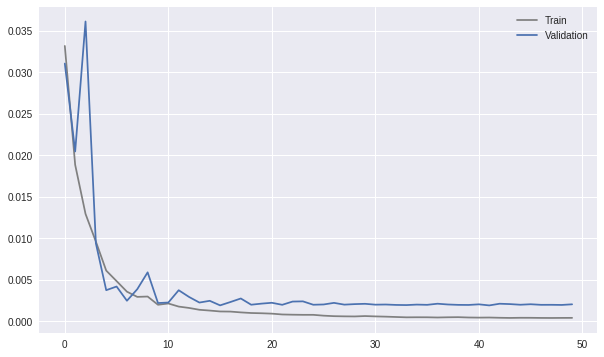

In [12]:
#plotting the loss and validation loss
plt.figure(figsize=(10,6))

#get losses from the history saved
plt.plot(np.array(history.history['loss'])/4, label='Train', color='gray')  
plt.plot(history.history['val_loss'], label='Validation') 

#graph legend
plt.legend()  
plt.show()

In [0]:
#make predictions
pred = model.predict(X_test)

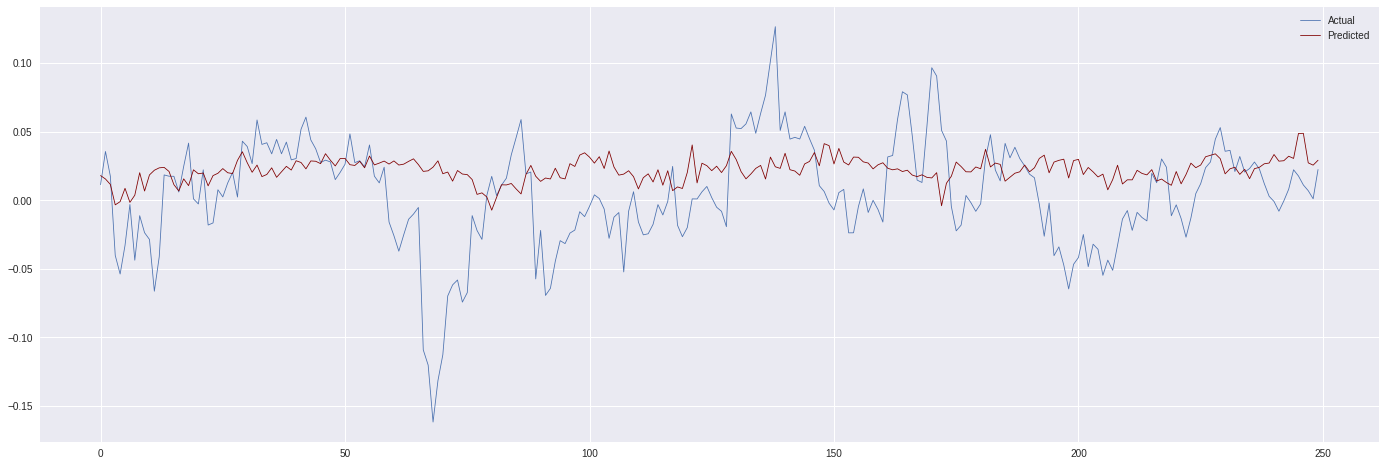

In [14]:
#plot them
plt.figure(figsize=(24,8))

#get length of the results
cycles = np.arange(len(y_test))

#plot cycles agaonts real
plt.plot(cycles, y_test, label="Actual", lw=0.8)

#plot cycles against predictions made
plt.plot(cycles, pred, 'maroon', label="Predicted", lw=0.8)

#graph legend
plt.legend()

plt.show()

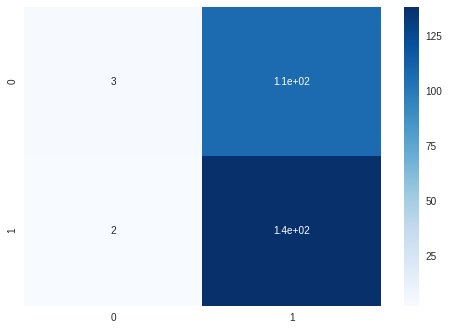

In [15]:
pred_binary = np.where(pred.ravel()>0, 1, 0)
y_binary = np.where(y_test>0, 1, 0)

cm = confusion_matrix(y_binary, pred_binary)
sns.heatmap(cm, annot=True, cmap='Blues')

In [16]:
print(classification_report(y_binary, pred_binary))

print ('Accuracy: %s' % (accuracy_score(y_binary, pred_binary)*100))

              precision    recall  f1-score   support

           0       0.60      0.03      0.05       110
           1       0.56      0.99      0.72       140

    accuracy                           0.56       250
   macro avg       0.58      0.51      0.38       250
weighted avg       0.58      0.56      0.42       250

Accuracy: 56.39999999999999


In [0]:
#ROC curve

fpr, tpr, thresholds = metrics.roc_curve(y_binary, pred_binary)
roc_auc = metrics.auc(fpr, tpr)

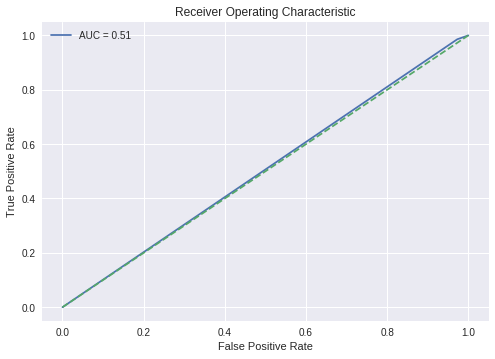

In [18]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [19]:
metrics.mean_absolute_error(y_test, pred)

0.03230723621894637